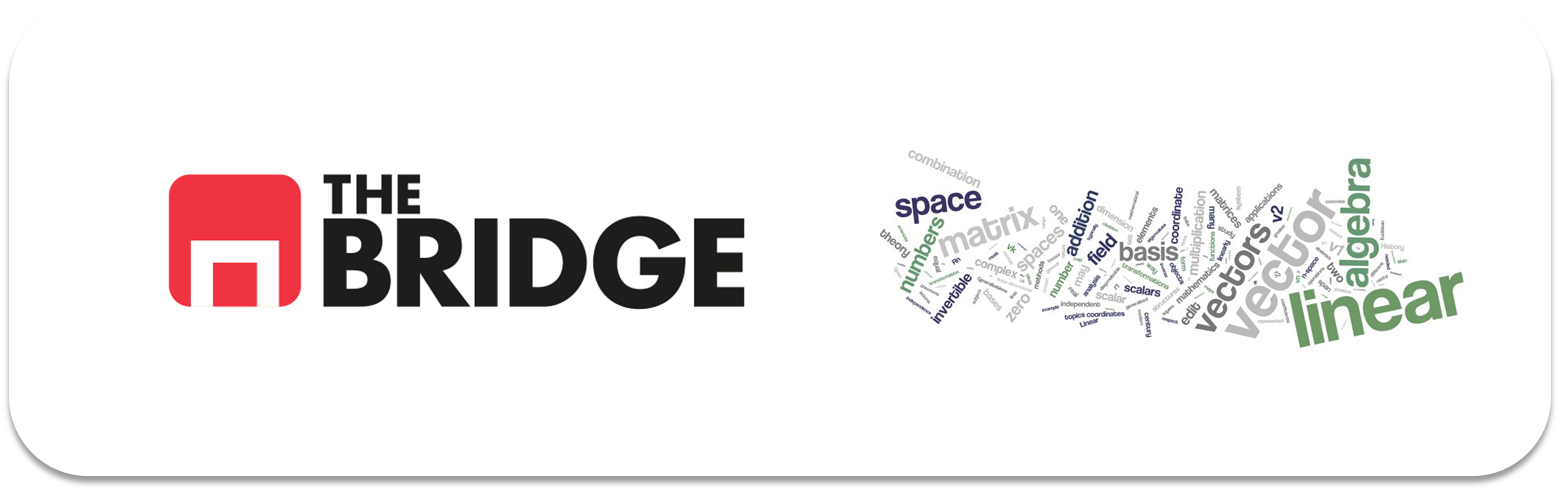

# Clases Extraescolares: Operaciones con Matrices (II)

## Contenidos

* [Operaciones: multiplicación de matrices](#Operaciones:-multiplicación-de-matrices)  
* [Nuevas peticiones: aplicando la multiplicación matricial](#Nuevas-peticiones:-aplicando-la-multiplicación-matricial)  
* [Matrices Especiales: identidad y transpuesta](#Matrices-Especiales:-identidad-y-transpuesta)  


En la sesión anterior vimos muy rápidamente el potencial de usar matrices para hacer ajustes rápidos, ahora vamos a ver una operación más potente: la multiplicación. La aplicaremos de forma práctica al último problema de la profesora Aidone, de la que nos despediremos eventualmente.

Para terminar, y como complemento de cultura general sobre Algebra, veremos algunos tipos particulares de matrices que nunca está de más conocer.

Como en sesiones anteriores, antes recuperaremos los datos que nos pueden ser necesarios, en concreto la matriz de nuevas asignaciones de clases extraescolares:

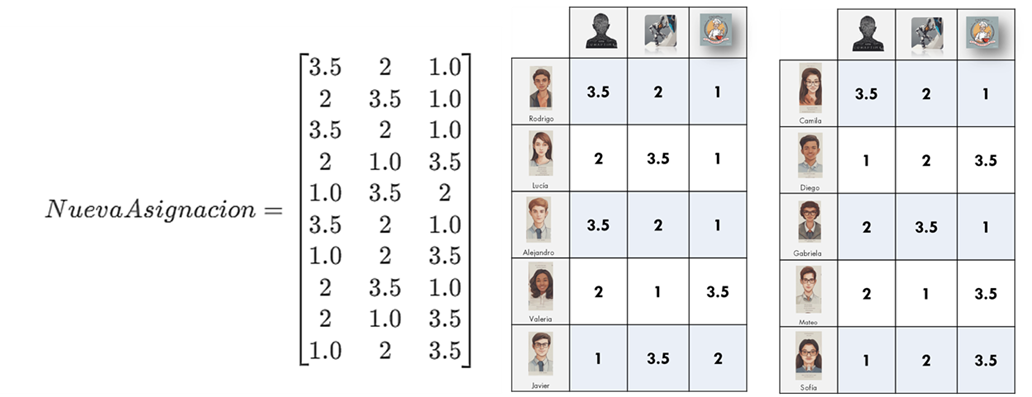

In [ ]:
matriz_asignacion_final = [[3.5, 2, 1.0],
 [2, 3.5, 1.0],
 [3.5, 2, 1.0],
 [2, 1.0, 3.5],
 [1.0, 3.5, 2],
 [3.5, 2, 1.0],
 [1.0, 2, 3.5],
 [2, 3.5, 1.0],
 [2, 1.0, 3.5],
 [1.0, 2, 3.5]]

### Operaciones: multiplicación de matrices  
[al indice](#Contenidos)  


La multiplicación de dos matrices o multiplicación matricial es una operación que da como resultado una tercera matriz cuyos elementos son el resultado de hacer el producto escalar de cada vector fila de la primera matriz con los vectores columna de la segunda. Hmmmm.... Veámoslo con un ejemplo:

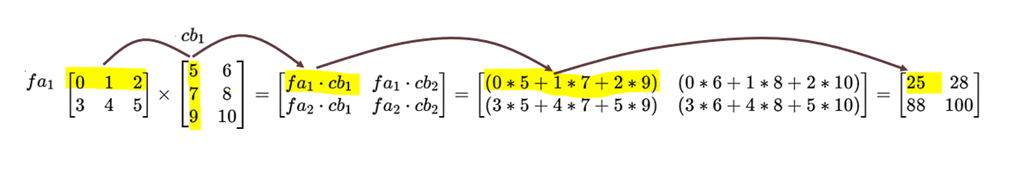

Cuando multiplicamos matrices, **el número de columnas de la primera matriz debe ser igual al número de filas de la segunda matriz**; y **el resultado** de esta multiplicación va a tener el **mismo número de filas que la primer matriz y el número de la columnas de la segunda matriz**. 

En el ejemplo la primera matriz tiene 3 columnas y la segunda 3 filas, se cumple la condició para que exista multiplicación. Además se ve que el resultado son 2 filas [el número de filas de la primera matriz] por 2 columnas [el número de columnas de la segunda matriz]


Algo a tener en cuenta a la hora de multiplicar matrices es que **la propiedad [connmutativa](https://es.wikipedia.org/wiki/Conmutatividad) no se cumple**. AxB no es lo mismo que BxA.

Programemos la multiplicación de dos matrices:

1. Recuperamos la función de producto escalar que ya codificamos en una sesión anterior

In [41]:
def dot_product(vec1, vec2, precision = 2):
    producto = 0
    for indice in range(len(vec1)): # Importante sólo podemos hacer producto escalar de vectores con el mismo número de componentes o dimensiones
        producto += vec1[indice] * vec2[indice]
    producto = round(producto, precision)
    return producto

2. Como vamos a hacer productos escalares con vectores columna de la segunda matríz, nos programamos una función que nos devuelve esos vectores, básicamente que traspone las columnas por las filas

In [42]:
def get_vec_col(matriz):
    num_filas = len(matriz)
    num_columnas= len(matriz[0])
    lista_vec_columnas = []
    for j in range(num_columnas): # Recorremos las columnas
        new_vec = []
        for i in range(num_filas): # Recorremos las filas, el total de filas es el número de elementos de la lista matriz
            new_vec.append(matriz[i][j])
        lista_vec_columnas.append(new_vec)
    return lista_vec_columnas
        

3. Ya tenemos todo lo necesario para hacer el producto

Y ahora probemos con las matrices del ejemplo

In [ ]:
matriz_A = [[0, 1, 2],
             [3, 4, 5]
]

matriz_B = [
            [5, 6], 
            [7, 8], 
            [9, 10]
]

Antes de multiplicarlas veamos el efecto de "transponer" que conseguimos con la función `get_vec_col`

Y ahí está, el resultado esperado.

### Nuevas peticiones: aplicando la multiplicación matricial  
[al indice](#Contenidos)  


Como si nos hubieran escuchado, en Administración de "TheBridge" han decidido hacernos otro par de peticiones.

Les han llegado los prespuestos de dos posibles proveedores de las clases extraescolares:

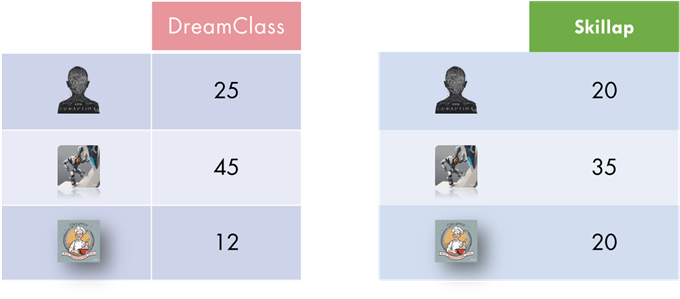

Y quieren saber el coste semanal por alumno y el total semanal para cada opción. Evidentemente, podrían meterlo en una excel todos los datos y echar un rato haciendo las multiplicaciones y tal, y tal...

Pero a la profesora Aidone se le ocurre rapidamente como solucionarlo utilizando la multiplicación matricial y luego un poquito de programación... ¿y a tí?

¿Ya? Convierte a los proveedores en una matriz y le basta con multiplicar la de asignaciones por la nueva matriz así:

$$MatrizProveedores = \begin{bmatrix}25&20\\45&35\\12&20\end{bmatrix} \to \begin{bmatrix}3.5&2&1.0\\2&3.5&1.0\\3.5&2&1.0\\2&1.0&3.5\\1.0&3.5&2\\3.5&2&1.0\\1.0&2&3.5\\2&3.5&1.0\\2&1.0&3.5\\1.0&2&3.5\end{bmatrix} \times \begin{bmatrix}25&20\\45&35\\12&20\end{bmatrix}$$

 El resultado de la multiplicación de las dos matrices nos va a dar una tercera matriz con tantas filas como alumnos y con el gasto semanal por proveedor en cada columna.

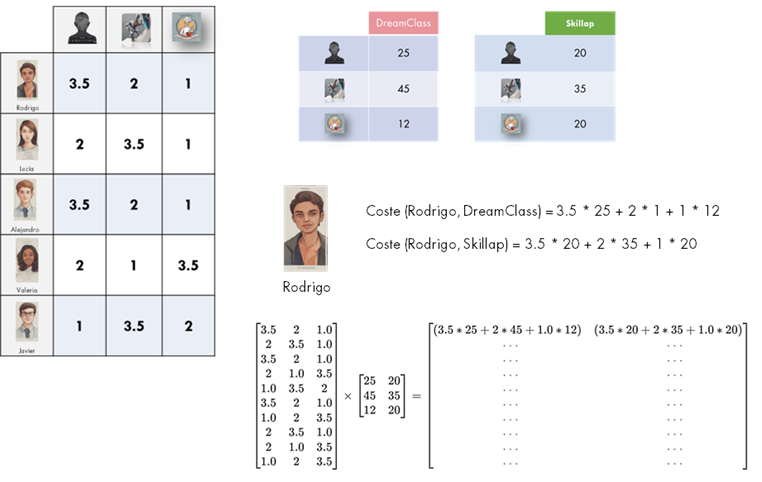

En definitiva, el producto de las dos matrices nos da el coste por alumno y proveedor a la semana:

$$\begin{bmatrix}3.5&2&1.0\\2&3.5&1.0\\3.5&2&1.0\\2&1.0&3.5\\1.0&3.5&2\\3.5&2&1.0\\1.0&2&3.5\\2&3.5&1.0\\2&1.0&3.5\\1.0&2&3.5\end{bmatrix} \times \begin{bmatrix}25&20\\45&35\\12&20\end{bmatrix} = \begin{bmatrix}(3.5*25+2*45+1.0*12)&(3.5*20+2*35+1.0*20)\\(2*25+3.5*45+1.0*12)&(2*20+3.5*35+1.0*20)\\(3.5*25+2*45+1.0*12)&(3.5*20+2*35+1.0*20)\\(2*25+1.0*45+3.5*12)&(2*20+1.0*35+3.5*20)\\(1.0*25+3.5*45+2*12)&(1.0*20+3.5*35+2*20)\\(3.5*25+2*45+1.0*12)&(3.5*20+2*35+1.0*20)\\(1.0*25+2*45+3.5*12)&(1.0*20+2*35+3.5*20)\\(2*25+3.5*45+1.0*12)&(2*20+3.5*35+1.0*20)\\(2*25+1.0*45+3.5*12)&(2*20+1.0*35+3.5*20)\\(1.0*25+2*45+3.5*12)&(1.0*20+2*35+3.5*20)\end{bmatrix}$$

Creemos la matriz de presupuestos de proveedores y aprovechemos nuestras nuevas funciones y obtengamos el coste semanal

In [ ]:
matriz_proveedores = [
                        [25,20],
                        [45,35],
                        [12,20]
]

Ahora nos queda sumar las columnas y tendremos el coste total, te lo dejo como tarea, el resultado para que lo puedas comprobar es:

* **DreamClass = 1802**

* **Skillap = 1637.5**

Y para terminar con esta introducción básica a vectores y matrices, tres tipos particulares de matrices que es bueno que conozcas y que te vayan sonando

### Matrices Especiales: identidad y transpuesta  
[al indice](#Contenidos)  


#### La matriz identidad

La [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es el elemento neutro en la [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices), es el equivalente al número 1. Cualquier matriz multiplicada por la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) nos da como resultado la misma matriz. La [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) (tiene siempre el mismo número de filas que de columnas); y su diagonal principal se compone de todos elementos 1 y el resto de los elementos se completan con 0. Suele representase con la letra I

Por ejemplo la matriz identidad de 3x3 sería la siguiente:

$$I=\begin{bmatrix}1 & 0 & 0 & \\0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}$$


#### La matriz transpuesta

La [matriz transpuesta](http://es.wikipedia.org/wiki/Matriz_transpuesta) es aquella en que las filas se transforman en columnas y las columnas en filas. Se representa con el símbolo $A^\intercal$

$$\begin{bmatrix}a & b & \\c & d & \\ e & f & \end{bmatrix}^T:=\begin{bmatrix}a & c & e &\\b & d & f & \end{bmatrix}$$

Si te fijas es lo que hacemos con nuestra funcion `get_vec_col`, a la que ahora ya podríamos llamar algo como `mat_transpose`